# Reference

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data
data = pd.read_csv('newborn.csv')
# Check the data to make sure no nan exists
# data.info()

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold

In [4]:
y = data['bwt']
X = data.loc[:, data.columns != 'bwt']

features = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Base Model: Decision Tree

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [6]:
model = DecisionTreeRegressor()
depth = range(1,10)
grid = dict(max_depth = depth)
cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)
gridSearch = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                          cv=cvFold, scoring="neg_mean_absolute_error")
searchResults = gridSearch.fit(X_train, y_train)

# the best model is
regr_base = searchResults.best_estimator_
best_max_depth = searchResults.best_params_['max_depth']
print('the best max_depth is %d'%(best_max_depth))

the best max_depth is 5


In [7]:
# predict
y_pred = regr_base.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('The root mean squared error in testing set is %.2f'%(rmse))
print('The mean absolute error in testing set is %.2f'%(mae))

The root mean squared error in testing set is 298.50
The mean absolute error in testing set is 237.78


In [8]:
# visualization on whole datasets
import graphviz
from dtreeviz.trees import dtreeviz

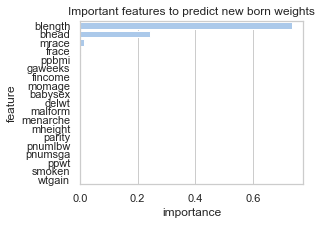

In [9]:
# feature importance
# Extracting the importances by sklearn 
importances = regr_base.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_dict = {}
for col, val in sorted(zip(features, importances), key=lambda x:x[1], reverse=True):
    feature_importance_dict[col] = val

feature_importance_df = pd.DataFrame({'feature':feature_importance_dict.keys(),
                                      'importance':feature_importance_dict.values()})
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(4, 3))
sns.set_color_codes("pastel")
sns.barplot(y='feature', x='importance', data=feature_importance_df, color="b")
plt.title('Important features to predict new born weights')
plt.show()

## XGBoost Model

In [10]:
import xgboost as xgb

In [11]:
model = xgb.XGBRegressor()
lr = np.arange(0.05, 0.3, 0.05)
gamma = np.arange(0, 0.5, 0.1)
max_depth = range(3, 10)
# min_child_weight = range(3, 10)
colsample = np.arange(0.3, 0.8, 0.1)
n_estimators = [10, 20, 50]

grid = dict(learning_rate = lr, gamma = gamma, max_depth = max_depth, 
            colsample_bytree = colsample, n_estimators = n_estimators)
cvFold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
gridSearch = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                          cv=cvFold, scoring="neg_mean_absolute_error")
searchResults = gridSearch.fit(X_train, y_train)

# the best model is
regr_xgboost = searchResults.best_estimator_
# searchResults.best_params_

In [12]:
# predict
y_pred = regr_xgboost.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('The root mean squared error in testing set is %.2f'%(rmse))
print('The mean absolute error in testing set is %.2f'%(mae))

The root mean squared error in testing set is 265.94
The mean absolute error in testing set is 213.55


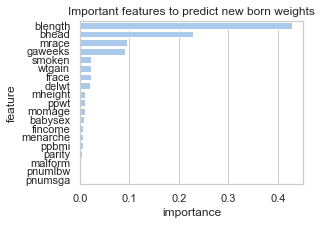

In [13]:
# feature importance
# Extracting the importances by sklearn 
importances = regr_xgboost.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_dict = {}
for col, val in sorted(zip(features, importances), key=lambda x:x[1], reverse=True):
    feature_importance_dict[col] = val

feature_importance_df = pd.DataFrame({'feature':feature_importance_dict.keys(),
                                      'importance':feature_importance_dict.values()})
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(4, 3))
sns.set_color_codes("pastel")
sns.barplot(y='feature', x='importance', data=feature_importance_df, color="b")
plt.title('Important features to predict new born weights')
plt.show()

## Neural Network Model

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neural_network import MLPRegressor

In [16]:
model = MLPRegressor(max_iter=200)
n_hidden_layer = range(1,5)
n_neurons = [100, 200, 400]
n_hidden_sizes = [(v,)*u for v in n_neurons for u in n_hidden_layer]
# alpha = [0.0001, 0.001, 0.01]
grid = dict(hidden_layer_sizes = n_hidden_sizes)
cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)
gridSearch = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                          cv=cvFold, scoring="neg_mean_absolute_error")
searchResults = gridSearch.fit(X_train, y_train)

# the best model is
regr_mlp = searchResults.best_estimator_
# searchResults.best_params_

C:\Users\XinXining\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
# predict
y_pred = regr_mlp.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('The root mean squared error in testing set is %.2f'%(rmse))
print('The mean absolute error in testing set is %.2f'%(mae))

The root mean squared error in testing set is 270.13
The mean absolute error in testing set is 213.30
